# Introduction

Data Science is an up and coming field with applications in just about every industry. Computer Science is a central component of data science since programming allows us to apply analysis techniques to the large and diverse data sets that arise in real-world applications. In this lab, you will have a chance to dabble in data science by analyzing data about Airbnb listings in San Francisco. Data Science involves analyzing large data sets and drawing conclusions from them through exploration, prediction, and inference. This lab will focus on exploratory data analysis and will be split into three core components: 
1. Understanding and cleaning the data 
2. Analyzing the data 
3. Data visualization 

While all of the code below can also be run in Snap!, it is easier and more efficient to run in Python as you will see over the course of this lab. <br> Here is a reference Snap! file which has some of the functions you will work on shown in Snap! - http://snap.berkeley.edu/snapsource/snap.html#present:Username=meghna15&ProjectName=dataLab <br> Don't worry if you don't understand all of it now, we will walk you through each of these functions during the course of the lab! 

For this lab, we will be using a new interface called the iPython notebook (which you are in right now!) It is just a more convenient, web-based interactive environment where you can combine code execution, text, mathematics,
plots and media into a single document. This is a brief tutorial on how to use iPython notebooks - http://cs231n.github.io/ipython-tutorial/ 

<b>Note:</b> You can edit the code inline. Once you write your code in a cell press shift + enter to run it. Once you are done with the lab, press File > Save and Checkpoint to store your code. 

## Understanding and Cleaning the Data 

The first step to exploratory data analysis is understanding what data points you have and cleaning your data up to make it into a usable format. This is important because most data is typically sourced from the internet. A lot of the data found online has inconsistencies, missing values, and errors which can make it difficult to use for data analysis. Hence, it is important to understand how to clean data so that you know how to fix these inconsistencies if you ever do data analysis yourself in the future. 

Run the following cell to load in the data:

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datascience import *

The import statements above are used to import different libraries in Python into this iPython environment. A "library" in Python is a collection of additional tools and functions. 

### Loading Data

Most of the data that you find online is typically in a 'csv' (comma separated values) format. <br> Python makes it very easy to convert these values into a readable Table using the commands shown below. 

To do this in Snap! you can use the blocks below: 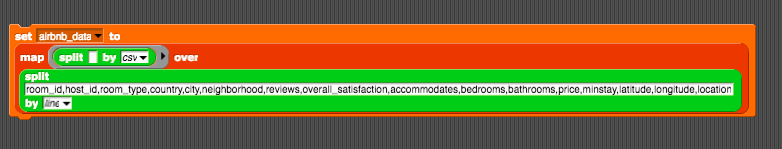

In the code below, we tell Python to read the CSV file `airbnb_sf.csv` and convert it to a data table that we can interact with.

In [40]:
airbnb_data = Table.read_table('airbnb_sf.csv')
airbnb_data

room_id,host_id,room_type,country,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,location
4897143,22931450,Shared room,nan,San Francisco,North Beach,93,4.5,4,1,nan,147,nan,37.7993,-122.404,0101000020E610000069C36169E0995EC091F3FE3F4EE64240
4670847,22931450,Shared room,nan,San Francisco,North Beach,115,4.5,4,1,nan,137,nan,37.7989,-122.404,0101000020E610000077F35487DC995EC0670FB40243E64240
13636171,33663709,Shared room,nan,San Francisco,Financial District,xxx,0,2,1,nan,41,nan,37.7922,-122.394,0101000020E6100000C6FA062637995EC0BF6378EC67E54240
18948580,130037991,Shared room,nan,San Francisco,South of Market,xxx,0,3,1,nan,42,nan,37.7805,-122.393,0101000020E610000018EAB0C22D995EC0E99D0AB8E7E34240
4347535,3344775,Shared room,nan,San Francisco,Western Addition,xxx,0,1,1,nan,400,nan,37.7706,-122.436,0101000020E610000086915ED4EE9B5EC0E76D6C76A4E24240
6750199,25714209,Shared room,nan,San Francisco,Downtown/Civic Center,4,5,2,1,nan,145,nan,37.7858,-122.417,0101000020E6100000800C1D3BA89A5EC071546EA296E44240
11461771,9744251,Shared room,nan,San Francisco,Downtown/Civic Center,8,4,14,1,nan,138,nan,37.7821,-122.422,0101000020E61000004ED1915CFE9A5EC0B7F1272A1BE44240
259622,329072,Shared room,nan,San Francisco,Financial District,125,4.5,4,1,nan,90,nan,37.7944,-122.405,0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE54240
785901,329072,Shared room,nan,San Francisco,Financial District,78,4.5,4,1,nan,90,nan,37.7931,-122.404,0101000020E610000074232C2AE2995EC0EC51B81E85E54240
786506,329072,Shared room,nan,San Francisco,Financial District,83,4.5,4,1,nan,90,nan,37.7926,-122.403,0101000020E6100000AD174339D1995EC030F488D173E54240


To understand what information you have, it is important to identify the different columns in the table. You can do this in Snap! by looking at the first item of the table: 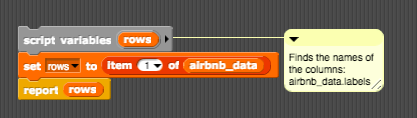 Python has this in-built function to get all the column names: 

In [41]:
airbnb_data.labels

('room_id',
 'host_id',
 'room_type',
 'country',
 'city',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'bathrooms',
 'price',
 'minstay',
 'latitude',
 'longitude',
 'location')

As you can see, this table has 16 columns. A brief description of some of the columns is given below: 

<b>room_id:</b> A unique number identifying an Airbnb listing

<b>host_id:</b> A unique number identifying an Airbnb host

<b>room_type:</b> One of “Entire home/apt”, “Private room”, or “Shared room”

<b>neighborhood:</b> A subregion of the city or search area where this data is from 

<b>reviews:</b> The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.

<b>overall_satisfaction:</b> The average rating (out of five) that the listing has received from visitors who left a review.

<b>accommodates:</b> The number of guests a listing can accommodate.

<b>bedrooms:</b> The number of bedrooms a listing offers.

<b>price:</b> The price (in $US) for a night stay.

<b>minstay:</b> The minimum stay for a visit, as posted by the host.

<b>latitude and longitude:</b> The latitude and longitude of the listing as posted on the Airbnb site

### Cleaning Data

Many times, when we work with data, we don't use all of the columns of our table. In cases like these, it's useful for us to drop these columns. 

Luckily, Python has a built-in function that you can use to remove the columns you don’t want from a table using the following command: airbnb_data.drop - Open one parenthesis and click shift + tab to read the documentation required for the command. For reference, this is what it should look like: ![shift+tab.png](shift+tab.png)

If we wanted to write this in Snap!, we would need to first identify the indices of the columns we'd like to drop, and then use the code below to drop them. Here is an example of dropping columns 4 and 5 from our data table in Snap!: ![drop1.png](drop1.png)

Don't worry if you are confused about how the above Snap! function works, it is a little complicated! Ask a Lab assistant or a TA to help you if you want to understand how it works. 

#### Question 1: Dropping Values

For the purposes of our analysis, we don't need the columns "country" or "city." Additionally, there is one other column that does not have meaningful data. Identify that column and drop that column, `country`, and `city` from `airbnb_data` in the cell below.

Note: If you just ran “airbnb_data.drop(`column names here`)”, it wouldn’t change the original table “airbnb_data”. This is because it is equivalent to running the above map function without actually setting the variable 'airbnb_data' to what the map function returns. In Snap!, you would do what is shown below to save the 'airbnb_data' value: 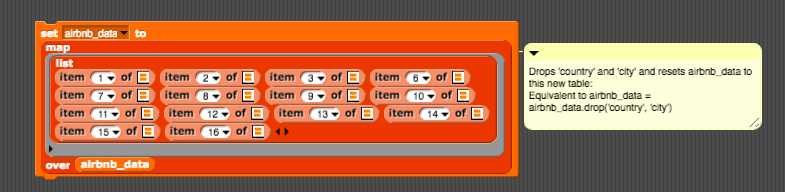 

In Python, it is important to assign “airbnb_data” to the new table using the assignment statement (=) above so that future references to the table don’t have the columns you don’t want. 

#### Question 2: Renaming Columns

Some of the columns have very long names. Relabel three columns (“overall_satisfaction”, “latitude”, and “longitude”) with these new column names (“satisfaction”, “lat” and “long”). In Snap! we would replace the column names (which are the items in the first column of the table) using: 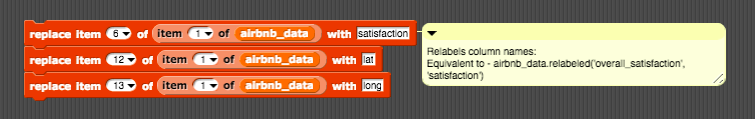 

Python has a built-in function for this purpose. Use the following command for all three columns:

In [42]:
airbnb_data = airbnb_data.relabeled('overall_satisfaction', 'satisfaction')

##Do the same for the remaining two columns (latitude and longitude)


#### Question 3: Removing Bad Data

As we mentioned before, most data that you find on the internet will often have missing or unusual values which you should usually remove before starting your analysis. One column in the above table has several “xxx” values. We don't want to consider rows with these unhelpful values, so we must clean them out of the data. 

Print out the table to find which column contains these "xxx" values. Then delete the rows with those values using the command airbnb_data.where(‘Column_Name’,  are.not_equal_to(‘xxx’))

In [43]:
#Use this cell to find the column with "xxx" values

In [44]:
#Remove the xxx values 

# Data Analysis 

Now that we have cleaned the data, it’s time to analyze the data. Analyzing data helps you make decisions backed up by quantitative evidence, which is becoming increasingly important in every industry. The following part of the lab will show you how to implement a range of different functions to better analyze your data and find the information that is important to you. For example: if you were interested in finding the average prices of Airbnb listings in SF or analyzing how Airbnb listings in a specific neighborhood differ from others, you can use the functions shown below to find all of this information. 

## Sorting

As a starting point, let's try sorting our data. The `sort` function allows us to sort a table by the values in a particular column.

In [18]:
# Sort our table alphabetically by neighborhood
airbnb_data = airbnb_data.sort('neighborhood')
airbnb_data

room_id,host_id,room_type,neighborhood,reviews,satisfaction,accommodates,bedrooms,bathrooms,price,minstay,lat,long,location
19034998,43831356,Shared room,Bayview,3,5,1,1,nan,45,nan,37.7256,-122.395,0101000020E6100000D15D126745995EC0B189CC5CE0DC4240
17478285,40297300,Shared room,Bayview,31,5,2,1,nan,59,nan,37.7272,-122.372,0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240
12110830,64946886,Entire home/apt,Bayview,32,4.5,3,1,nan,90,nan,37.7205,-122.392,0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240
14049725,36752,Entire home/apt,Bayview,14,5,6,2,nan,225,nan,37.7192,-122.396,0101000020E610000068B114C957995EC0BC9179E40FDC4240
10943013,56741447,Entire home/apt,Bayview,13,4.5,16,3,nan,235,nan,37.7383,-122.386,0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240
14341301,31370440,Entire home/apt,Bayview,20,5,8,2,nan,285,nan,37.7298,-122.369,0101000020E61000002FFD4B5299975EC04C88B9A46ADD4240
3689368,15698216,Entire home/apt,Bayview,205,4.5,6,2,nan,192,nan,37.7284,-122.398,0101000020E61000003B54539275995EC0AC1C5A643BDD4240
2801140,3445108,Entire home/apt,Bayview,70,4.5,7,3,nan,189,nan,37.7182,-122.388,0101000020E61000003161342BDB985EC0F27B9BFEECDB4240
15990158,3967769,Entire home/apt,Bayview,5,4.5,5,2,nan,150,nan,37.73,-122.39,0101000020E610000050508A56EE985EC0CDCAF6216FDD4240
2521327,12908133,Entire home/apt,Bayview,16,4.5,2,1,nan,150,nan,37.7325,-122.388,0101000020E6100000AD68739CDB985EC0130EBDC5C3DD4240


Notice that the table is now sorted alphabetically by neighborhood. By default, the `sort` function sorts in increasing order.

Calling `sort` on a table does not alter the table. Instead, it returns a new table that is sorted accordingly. By reassigning the variable 'airbnb_data' to the result of calling the SORT function, when we access 'airbnb_data' in the second line, the data is now sorted. If we did not reassign the variable, the sorting would not persist. Consider the following example.

In [19]:
airbnb_data.sort('price') # sort the table by the price column
airbnb_data # the table displayed is still sorted by neighborhood, not by price!

room_id,host_id,room_type,neighborhood,reviews,satisfaction,accommodates,bedrooms,bathrooms,price,minstay,lat,long,location
19034998,43831356,Shared room,Bayview,3,5,1,1,nan,45,nan,37.7256,-122.395,0101000020E6100000D15D126745995EC0B189CC5CE0DC4240
17478285,40297300,Shared room,Bayview,31,5,2,1,nan,59,nan,37.7272,-122.372,0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240
12110830,64946886,Entire home/apt,Bayview,32,4.5,3,1,nan,90,nan,37.7205,-122.392,0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240
14049725,36752,Entire home/apt,Bayview,14,5,6,2,nan,225,nan,37.7192,-122.396,0101000020E610000068B114C957995EC0BC9179E40FDC4240
10943013,56741447,Entire home/apt,Bayview,13,4.5,16,3,nan,235,nan,37.7383,-122.386,0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240
14341301,31370440,Entire home/apt,Bayview,20,5,8,2,nan,285,nan,37.7298,-122.369,0101000020E61000002FFD4B5299975EC04C88B9A46ADD4240
3689368,15698216,Entire home/apt,Bayview,205,4.5,6,2,nan,192,nan,37.7284,-122.398,0101000020E61000003B54539275995EC0AC1C5A643BDD4240
2801140,3445108,Entire home/apt,Bayview,70,4.5,7,3,nan,189,nan,37.7182,-122.388,0101000020E61000003161342BDB985EC0F27B9BFEECDB4240
15990158,3967769,Entire home/apt,Bayview,5,4.5,5,2,nan,150,nan,37.73,-122.39,0101000020E610000050508A56EE985EC0CDCAF6216FDD4240
2521327,12908133,Entire home/apt,Bayview,16,4.5,2,1,nan,150,nan,37.7325,-122.388,0101000020E6100000AD68739CDB985EC0130EBDC5C3DD4240


## Accessing and Manipulating Data

### Column and Item
The `column` function allows us to select a particular column from a table.<br>
The `item` function allows us to select particular values in a column. 

`column` takes in a string as input and returns the column whose label matches the string. This allows us to select a given column from a table. Each column is a stored as a Numpy array of values. An Numpy array is very similar to a list in the sense that it is also used to store values. However, Numpy arrays typically have more functionality as you will see below. We can apply functions to a column in order to investigate the data.
    
`item` takes as input an integer and returns the value at that index in the array.

In [45]:
airbnb_data.column('price') # the output is an np array

array([147, 137,  41, ...,  40,  38,  10])

<b>Note:</b> An np array is output as shown above - array([150,  45,  59, ...,  56,  60,  39]) while a normal Python list is output as - [1, 2, 3, 4]. 

In [46]:
price_list = airbnb_data.column('price') # store the price array 
print(price_list.item(2)) # print the price at the 2nd position of the np array 
print(len(price_list)) # print the length of the price array 

41
8344


In [47]:
airbnb_data.column('neighborhood').item(0) # get the 0th item in the neighborhood column

'North Beach'

The above command could have been done in Snap! using this script: 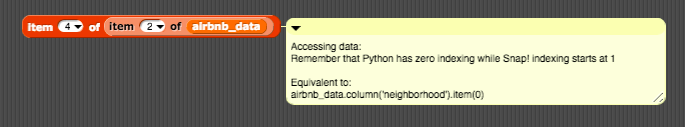

While Snap! has enough functionality to be able to perform most of these commands, Python has built-in libraries which allow you to do it more easily and efficiently. For the remaining functions, we will focus on how to use the Python functions. If you are interested in learning how to do this in Snap!, feel free to try it yourself or ask in lab! 

#### Question 4: Finding Top Price

Now, using both sorting and accessing methods, find the price of the most expensive listing in San Francisco. <br>
(Hint: Take a look at the documentation for the SORT command to see how to sort in a different order.)

In [51]:
# Find the price of the most expensive listing

#### Question 5: Finding Mean Price

A column is an np array of values, and we can apply many different functions to a column in order to gain insight into the data. Using the "np.mean" function, which takes as input an np array, find the average price of a listing. 

Note: You cannot call np.mean on a normal Python list, this function has to take in an np array as an input. 

In [52]:
# Find the average price of a listing

Now that we know what the average price of a listing is, let's try comparing the price of each listing to the average. Using the WITH_COLUMN function, we can append more columns to the end of our table. This is often useful if we want to include additional information in our table. 

The WITH_COLUMN function takes in the name of the new column and an np array of values for that column. Since we want to compare the price of each listing to the average, we want to essentially compare the values in the 'price' column with the avg_price calculated above. 

One cool thing about np arrays is that when you call them with a certain function, it applies that function to each value within the array. So for example if you run the command given below, Python will look at each value in the price array, compare it to 300, and then set the value in the returned array to False if the value is less than 300 and True otherwise. 

In [25]:
airbnb_data.column('price')>300 

array([False, False, False, ..., False, False, False])

The following example shows how the `with_column` function can be used.

In [26]:
airbnb_data.with_column('expensive', airbnb_data.column('price')>300)

room_id,host_id,room_type,neighborhood,reviews,satisfaction,accommodates,bedrooms,bathrooms,price,minstay,lat,long,location,expensive
19034998,43831356,Shared room,Bayview,3,5,1,1,nan,45,nan,37.7256,-122.395,0101000020E6100000D15D126745995EC0B189CC5CE0DC4240,False
17478285,40297300,Shared room,Bayview,31,5,2,1,nan,59,nan,37.7272,-122.372,0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240,False
12110830,64946886,Entire home/apt,Bayview,32,4.5,3,1,nan,90,nan,37.7205,-122.392,0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240,False
14049725,36752,Entire home/apt,Bayview,14,5,6,2,nan,225,nan,37.7192,-122.396,0101000020E610000068B114C957995EC0BC9179E40FDC4240,False
10943013,56741447,Entire home/apt,Bayview,13,4.5,16,3,nan,235,nan,37.7383,-122.386,0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240,False
14341301,31370440,Entire home/apt,Bayview,20,5,8,2,nan,285,nan,37.7298,-122.369,0101000020E61000002FFD4B5299975EC04C88B9A46ADD4240,False
3689368,15698216,Entire home/apt,Bayview,205,4.5,6,2,nan,192,nan,37.7284,-122.398,0101000020E61000003B54539275995EC0AC1C5A643BDD4240,False
2801140,3445108,Entire home/apt,Bayview,70,4.5,7,3,nan,189,nan,37.7182,-122.388,0101000020E61000003161342BDB985EC0F27B9BFEECDB4240,False
15990158,3967769,Entire home/apt,Bayview,5,4.5,5,2,nan,150,nan,37.73,-122.39,0101000020E610000050508A56EE985EC0CDCAF6216FDD4240,False
2521327,12908133,Entire home/apt,Bayview,16,4.5,2,1,nan,150,nan,37.7325,-122.388,0101000020E6100000AD68739CDB985EC0130EBDC5C3DD4240,False


In this example, we started with our table and added an additional column labeled "expensive" which contains boolean values, based on whether or not the price of a listing is above $300 or not. Notice that because we did not reassign airbnb_data to the result of the call, our change is not saved. If we access airbnb_data now, the "expensive" column will not be shown.

#### Question 6: Adding Columns

Now, add a column to the table, labeled "diff from avg" that shows by how much the price of a listing is away from the average price. <br> (<b>Hint:</b> The np.abs function might be helpful)

Then, once you have added this column, add another column to the table, labeled "near avg" that is True if the listing is within 50 dollars of the average, and False otherwise.

In [54]:
# Add the difference from average column to the table

# Add the near average column to the table


###  Select and Where

If we want to create a new table from a particular set of columns in our current table, we can accomplish this using the SELECT function, as demonstrated below. Once again, the SELECT function does not affect the table it's called from. Instead it returns a new table containing only the specified columns.

In [28]:
# Create a new table of the room ID and the price of the room.
room_to_price = airbnb_data.select('room_id', 'price')
room_to_price

room_id,price
19034998,45
17478285,59
12110830,90
14049725,225
10943013,235
14341301,285
3689368,192
2801140,189
15990158,150
2521327,150


What if we only want to select some of the data, for example only those rooms that have a price within a certain range? The WHERE function allows us to return a table consisting of the same columns as the starting table, but with only those rows that satisfy a given condition. This could be done by using a combination of HOFs like "keep" and "map" in Snap! 

The first argument to WHERE is the label of a particular column. The second argument is a condition. For each row, if the value in the column specified by the first argument satisfies the condition, the row is included in the returned table. If it does not satisfy the condition, the row is excluded.

The following example creates a table consisting of listings in the Financial District:

In [29]:
# Return only those rows in the Financial District neighborhood
airbnb_data.where('neighborhood', are.equal_to('Financial District'))

room_id,host_id,room_type,neighborhood,reviews,satisfaction,accommodates,bedrooms,bathrooms,price,minstay,lat,long,location,diff from avg,near avg
259622,329072,Shared room,Financial District,125,4.5,4,1,nan,90,nan,37.7944,-122.405,0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE54240,109.5,False
785901,329072,Shared room,Financial District,78,4.5,4,1,nan,90,nan,37.7931,-122.404,0101000020E610000074232C2AE2995EC0EC51B81E85E54240,109.5,False
786506,329072,Shared room,Financial District,83,4.5,4,1,nan,90,nan,37.7926,-122.403,0101000020E6100000AD174339D1995EC030F488D173E54240,109.5,False
12857222,329072,Shared room,Financial District,26,4.5,4,1,nan,90,nan,37.793,-122.403,0101000020E610000049A0C1A6CE995EC0FF243E7782E54240,109.5,False
16606328,4582815,Shared room,Financial District,26,4.5,2,1,nan,85,nan,37.7846,-122.4,0101000020E61000007E3672DD94995EC0C7F319506FE44240,114.5,False
12857179,329072,Shared room,Financial District,17,4.5,4,1,nan,45,nan,37.7947,-122.403,0101000020E6100000D13B1570CF995EC030D63730B9E54240,154.5,False
786492,329072,Shared room,Financial District,76,4.5,4,1,nan,45,nan,37.7942,-122.403,0101000020E6100000A9F6E978CC995EC05C1C959BA8E54240,154.5,False
229240,329072,Shared room,Financial District,204,4.5,4,1,nan,45,nan,37.7934,-122.403,0101000020E61000004D0F0A4AD1995EC0221807978EE54240,154.5,False
12853799,329072,Shared room,Financial District,25,4.5,4,1,nan,45,nan,37.7935,-122.403,0101000020E6100000DDB5847CD0995EC0699082A790E54240,154.5,False
12857011,329072,Shared room,Financial District,13,4.5,4,1,nan,45,nan,37.7932,-122.403,0101000020E61000000D6E6B0BCF995EC067D7BD1589E54240,154.5,False


There are multiple conditions that the WHERE function can take in. Some of them are shown below (*taken from DS8). Note that x and y are numbers, STRING is a string, and Z is either a number or a string. 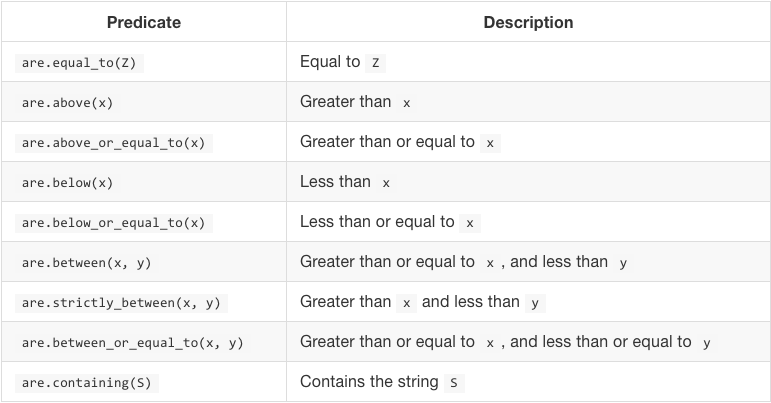

#### Question 7a: Filtering

In the cell below, use `where` to find all listings that have price greater than or equal to $500.

#### Question 7b: Filtering
In the cell below, use `where` to find all listings in the Mission neighborhood that have price less than or equal to $1000.

#### Question 7c: Filtering
In the cell below, use `where` to find all listings with latitude between 37.76 and 37.78 and longitude between -122.50 and -122.47.

#### Question 7d: Filtering
In the cell below, use `where` to find all listings with an average rating of at least 4, and more than 3 bedrooms.

### Data Visualization 

Aside from using traditional analysis techniques by manipulating a table, we can also analyze the data visually. Data visualization gives you a unique way to find graphical trends in your data and visualize your results in a way that is easier for you and your audience to understand.

First, let’s visualize the average distribution of prices based on number of bedrooms in the listing.
Below we generate a 2 column table where column 0 is the number of bedrooms and column 1 is the corresponding avg price. We didn't include listings with 0 or 7 bedrooms because there were not enough samples.

Use the Table.bar(‘column name’) command to plot a bar chart of average prices per night. You can find the documentation here - http://data8.org/datascience/_autosummary/datascience.tables.Table.bar.html#datascience.tables.Table.bar. 

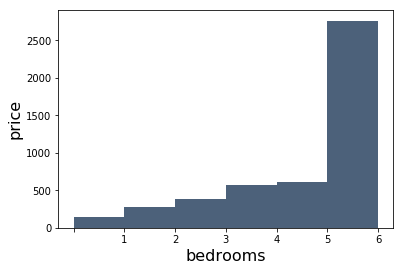

In [34]:
##You don't have to understand how this code works, but understand the table that it creates
bar_table = airbnb_data.select('bedrooms', 'price')
bar_table = bar_table.where('bedrooms', are.strictly_between(0, 7))
bar_table = bar_table.group('bedrooms', collect=lambda x: int(np.mean(x)))

##Plot a bar chart using bar_table
bar_table.bar('bedrooms')

#### Question 8: Interpreting Bar Chart

What do your findings suggest about the correlation betweeen number of bedrooms and price?

Your answer here

#### Question 9a: Preparing Data for a Scatter Plot

Another interesting thing to look at is how geographic location (in this case we'll look at longitude) correlates with price.<br> First, create a new table with only those two columns using the following command: 

In [55]:
scatter_table = "YOUR CODE HERE"

#### Question 9b: Creating a Scatter Plot

Then use this new table to plot a scatter plot using `scatter_table.scatter("price")`. 

In [56]:
##Draw a scatter plot here


You will notice that in the above scatter plot, there are few extremely expensive price outliers. These the plot out and make it harder to visualize the majority of the data. Let's get rid of these outliers to get a better look at the data.

#### Question 9c: Further cleaning our Data

Create a new table that only keeps the rows where `price` is less than 2400 from `scatter_table`. 

#### Question 9d: Updating our Scatter Plot
Plot your new table using the same function as above.

#### Question 9e: Interpreting Scatter Tables

How does price seem to be affected by longitude? Are there any parts of San Francisco with particularly more expensive listings?

Remember that very high and very low longitudes represent the edge of the city, while the middle longitude values represent the inner part of the city.

Your answer here

# [Extra for experience] Explore

Now it's your turn to explore a data set from scratch. The file - titanic_data.csv is a list of passengers on the Titanic. Using this dataset, answer the following questions.

1. What percent of passengers onboard the Titanic survived?
2. How did the class of a passenger affect their chance of survival?


# Conclusion 

Congrats on getting an idea of what data science looks like! As you saw with this lab, it may be useful for Airbnb hosts to use this data to see what price they can charge or if rooms in specific location in SF may be more popular than others. As more and more data is becoming available to us, all businesses and organizations have started using data analytics to streamline their operations, maximize profits, etc., so it is a very relevant field of study and a useful application of computer science.